# Importing libraries

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib as mpl 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,8) #Adjusting default configuration of plots.

In [3]:
# Read in the data

df = pd.read_csv(r"C:\Users\mraja\Downloads\movies.csv")

In [5]:
# Looking at the data

df.head() #Reads the first 5 rows of the data set

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Checking for any missing data across all columns

for i in df.columns:
    blank = np.mean(df[i].isnull())
    print('{} - {}%'.format(i, blank))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# Data types of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Changing data types

In [13]:
# Changing data types of columns

df['votes'] = df['votes'].astype('Int64') #"Int64" can handle Nan values in a column whereas "int64" would raise and error with Nan values

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

df['runtime'] = df['runtime'].astype('Int64')

# Creating new column

In [15]:
# Extracting the year out of "released column"

df['year'] = df['released'].str.extract(pat = '([0-9]{4})').astype("Int64")

In [17]:
# Determining which film generated the highest gross revenue.

a = pd.DataFrame(df.sort_values(by='gross', ascending=False).head(1))
a.loc[:,['name', 'year', 'director', 'budget', 'gross']]

,name,year,director,budget,gross
5445,Avatar,2009,James Cameron,237000000,2847246203


# Excecuting code

In [19]:
pd.set_option('display.max_rows', None)

# Indentifying the co-relation

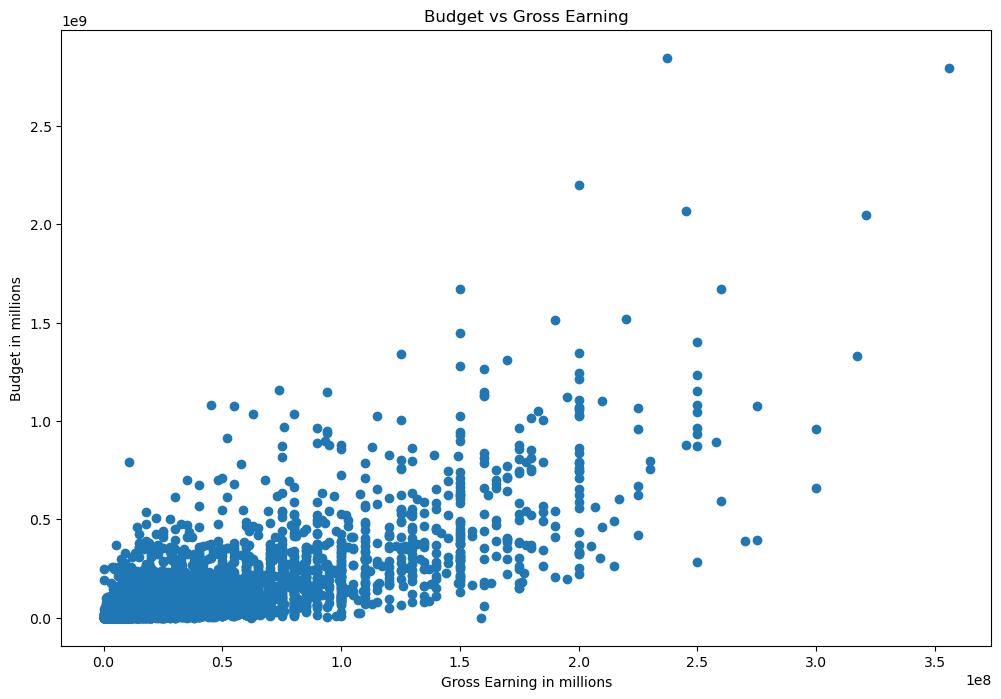

In [21]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning in millions')
plt.ylabel('Budget in millions')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

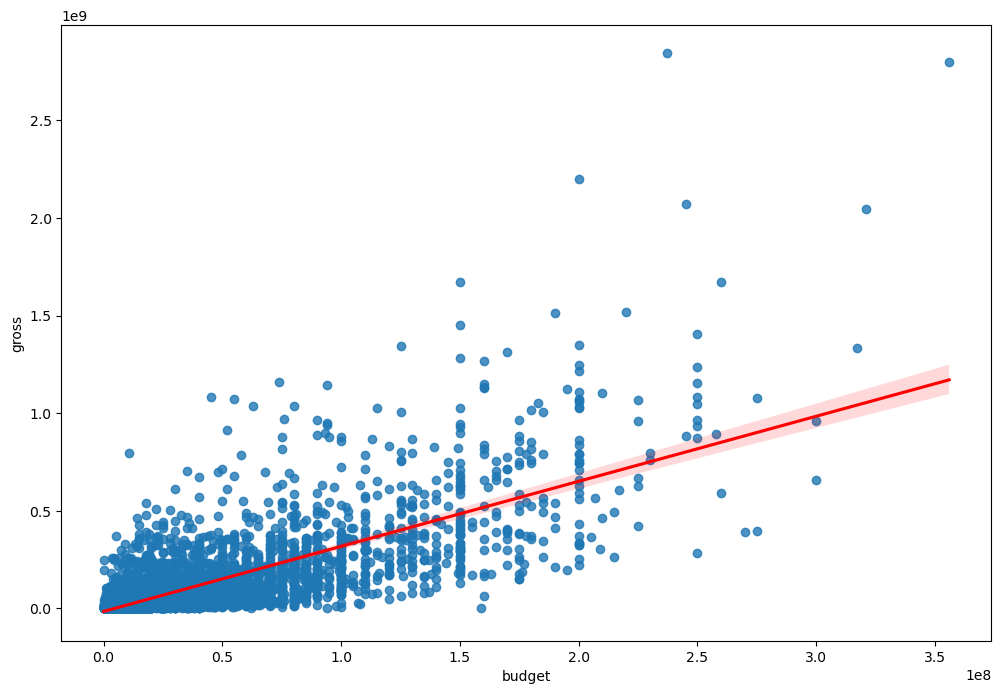

In [23]:
# Using Seaborn

sns.regplot(x='budget', y='gross', data=df, line_kws={"color" : "red"})

# ^^Scatterplot shows positive correlation

# Looking at the correlation

In [25]:
numeric_df = df.select_dtypes(include='number')

In [27]:
corelation_matrix = numeric_df.corr(method='kendall')

Text(120.72222222222221, 0.5, 'Movie Features')

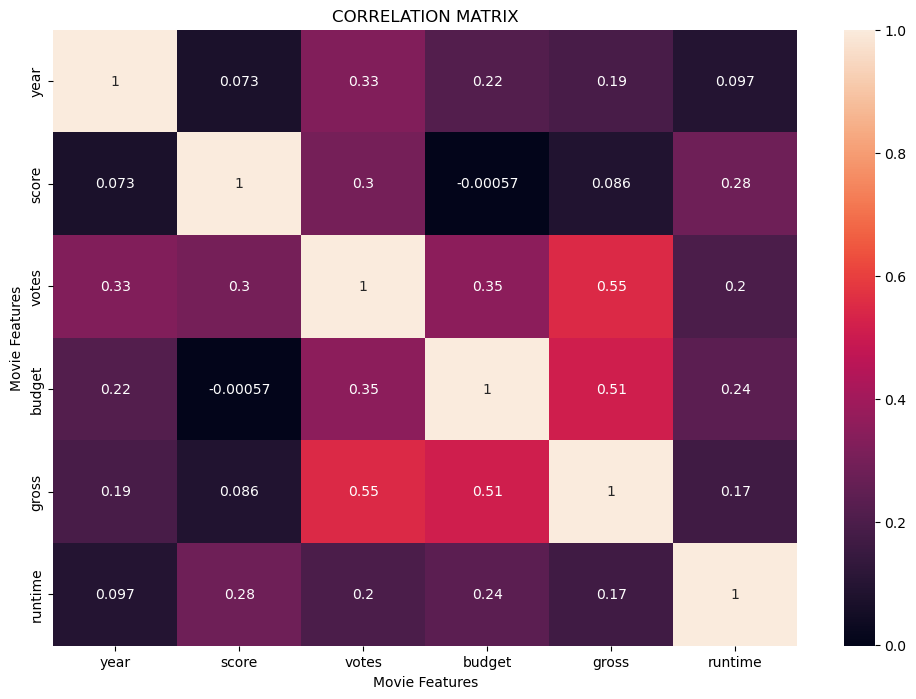

In [29]:
sns.heatmap(corelation_matrix, annot=True)

plt.title('CORRELATION MATRIX')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

In [31]:
numarized_df = df

# Assigning numerical values to columns with different data types to perform computations for correlation analysis.

In [33]:
for col_name in numarized_df:
    if numarized_df[col_name].dtype == 'object': # Checking the data type
        numarized_df[col_name] = numarized_df[col_name].astype('category') # Changing the data type 
        numarized_df[col_name] = numarized_df[col_name].cat.codes # ".cat.codes" gives random codes for computation

In [35]:
numarized_df.head(10) # shows the table with numarized values

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98
5,2109,6,10,1980,2502,6.4,123000,2528,4362,241,55,550000,39754601,1812,95
6,5574,6,0,1980,1771,7.9,188000,1412,838,1277,55,27000000,115229890,2281,133
7,4436,6,3,1980,699,8.2,330000,1829,1769,2240,55,18000000,23402427,631,129
8,5281,4,0,1981,1753,6.8,101000,2306,1979,877,55,54000000,108185706,883,127
9,6213,6,3,1980,2286,7.0,10000,2864,423,589,55,10000000,15795189,2272,100


In [37]:
numeric_df2 = numarized_df.select_dtypes(include='number')

In [39]:
corelation_matrix2 = numeric_df2.corr(method='kendall')

Text(120.72222222222221, 0.5, 'Movie Features')

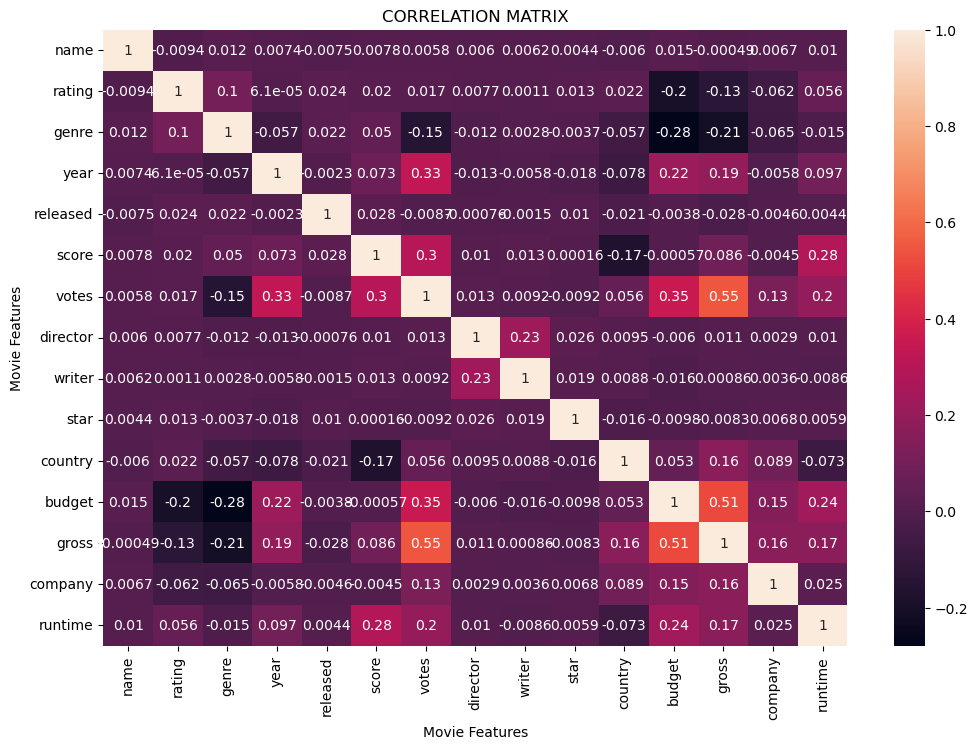

In [41]:
sns.heatmap(corelation_matrix2, annot=True)

plt.title('CORRELATION MATRIX')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')